<a href="https://colab.research.google.com/github/Zz990919/ESE527/blob/main/ESE527_mid_reprot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
# Checking for null values
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[0.09388728 0.02891548 0.0748303  0.03131461 0.13245527 0.02627495
 0.06752132 0.11037149 0.08437495 0.02758738 0.02934281 0.29312415]


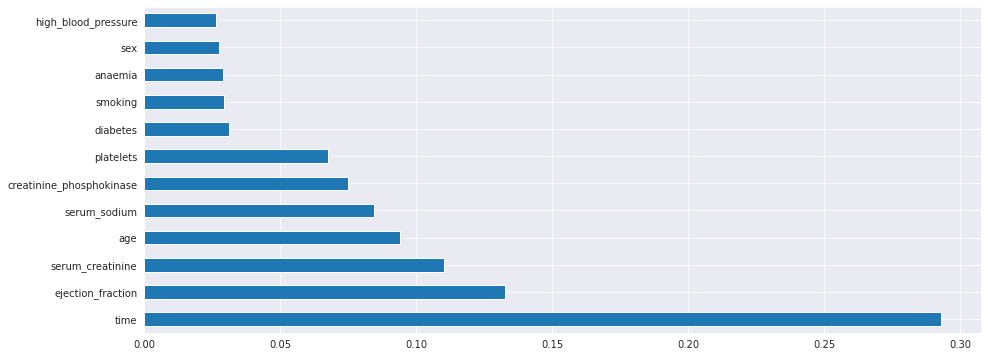

In [ ]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = heart.iloc[:, :-1]
y = heart.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

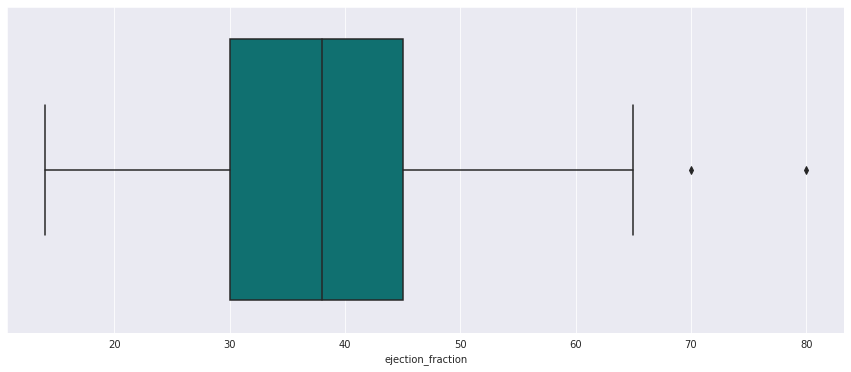

In [ ]:
# Boxplot for ejection_fraction

sns.boxplot(x = heart.ejection_fraction, color = 'teal')
plt.show()

In [ ]:
#remove the two outliers
heart[heart['ejection_fraction']>=70]
heart=heart[heart['ejection_fraction']<70]

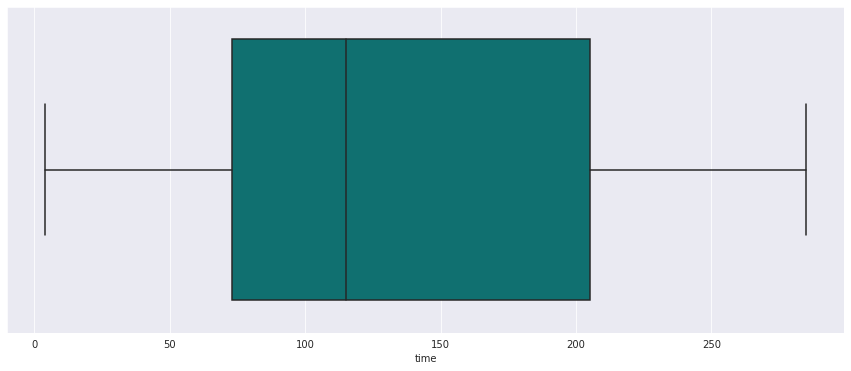

In [ ]:
# Boxplot for time
sns.boxplot(x=heart.time, color = 'teal')
plt.show()

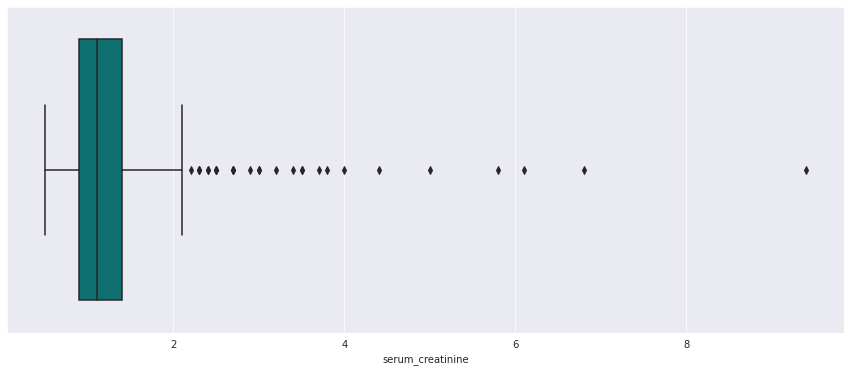

In [ ]:
# Boxplot for serum_creatinine
sns.boxplot(x=heart.serum_creatinine, color = 'teal')
plt.show()

In [ ]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart['time'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    opacity=1
))

In [ ]:
import plotly.express as px
fig = px.histogram(heart, x="time", color="DEATH_EVENT", marginal="violin", hover_data=heart.columns, 
                   title ="Distribution of TIME Vs DEATH_EVENT", 
                   labels={"time": "TIME"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [ ]:
# Distribution of ejection_fraction

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    opacity=1
))


In [ ]:
fig = px.histogram(heart, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=heart.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of serum_creatinine

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart['serum_creatinine'],
    xbins=dict( # bins used for histogram
        start=0.5,
        end=9.4,
        size=0.2
    ),
    opacity=1
))

In [ ]:
fig = px.histogram(heart, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=heart.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()